SPRINT 8
Nivel 1

Realiza la conexión en Python con el MySQL Workbech per a cargar toda la información que tienes en las tablas. 

Realizarás una visualización para cada ejercicio. Comenta el que te llama la atención al representar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos. 

1. Instalo el módulo conector de MySQL: MySQL conector y la librería seaborn

In [106]:
pip install mysql-connector-python


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


2. Importar todas la librerias y módulos que voy a usar

In [227]:
import mysql.connector # conector de mysql 
from mysql.connector import Error
import pandas as pd  # libreria de python para trabajar con datos estructurados
import numpy as np  # libreria de python para usar funciones estadísticas
import matplotlib.pyplot as plt  # para crear gráficas
import seaborn as sns  # para la visualización de datos estadísticos
from statistics import multimode # para calcular la moda
from datetime import datetime

3. Creo una función para conectarse a la base  de datos "r2trans" a través de mysql.connector. y comprobar que la conexión ha sido exitosa y leer el nombre de la base de datos. 

In [228]:
def connection():
    ''' Función que conecta con la base de datos y devuelve el nombre de la base de datos'''
    # utilizo el comando .connect() de mysql conector para conectarme a la base de datos r2trans
    connection = mysql.connector.connect(host='localhost',
                                         database='r2trans',
                                         user='root',
                                         password='12345678')
    # compruebo que estoy conectada a la base de datos e imprimo el nombre de la base de datos
    try: 
        if connection.is_connected():
            # .cursor() creo un cursor que me ayuda a poder ejecutar comandos en la base de datos para hacer una consulta
            cursor = connection.cursor()
            # .execute() es la instrucción que me permite ejecutar la consulta
            # en este caso selecciono el nombre de la base de datos
            cursor.execute("select database();")
            # .fetchone() me permite leer el resultado de la consulta
            record = cursor.fetchone()
            print("Estás conectado a la base de datos: ", record)
    except Error as e:
        print("Error al conectarse a la base de datos", e)
    return connection

In [229]:
conn = connection()

Estás conectado a la base de datos:  ('r2trans',)


4. Creo un nuevo cursor para seleccionar la tabla "transaction" y hago un recuento de filas para ver si coincide con el nº en mySQL y comprobar que me lo ha seleccionador correctamente.

In [230]:
sql_select_Query = "select * from transaction"
cursor = conn.cursor()
cursor.execute(sql_select_Query)
# .fetchall() = .fetchone() lo uso para leer el resultado de la consulta
records = cursor.fetchall()
print("Total number of rows in table: ", cursor.rowcount)

Total number of rows in table:  587


5. Me conecto a mySql para acceder a la base de datos, para que pandas pueda leerla y convertir la tabla transaction en un Dataframe que se llama "transaction"

In [231]:
# creo el Dataframe "transaction" con la información de la tabla "transaction" de la base de datos r2trans
transaction = pd.read_sql_query(sql_select_Query, conn)
transaction.head(5)

C:\Users\ronch\AppData\Local\Temp\ipykernel_50700\3880117267.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transaction = pd.read_sql_query(sql_select_Query, conn)


,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9184589824,-12.5275561984
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9694885888,-117.5251835904
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.222680576,-129.049879552
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593055232,-100.555928064
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381445632,158.298210304


6. Para no tener que acceder a cada tabla individualmente, 
creo una función que se conecta a la base de datos y cre un diccionario donde voy a almacenar todas las tablas de la base de datos "r2trans"

In [232]:
def importar_db():
    '''Función que se conecta a la base de datos, y crea un diccionario con todas las tablas de la base de datos'''
    # Creo un cursor para obtener los nombres de todas las tablas
    conn = connection()
    cursor = conn.cursor()
    cursor.execute("SHOW TABLES")
    tablas = cursor.fetchall()
    print(tablas)
    
    # Cargo cada tabla en dataframe de pandas y las guardo en un diccionario
    r2trans = {}
    for (nom_tabla,) in tablas:
        df = pd.read_sql_query(f"SELECT * FROM {nom_tabla}", conn)
        r2trans[nom_tabla] = df  # guardo cada tabla como un dataframe que añado a la base de datos
    
    # Accedo a las llaves del diccionario, para ver que se han creado todas las tablas. 
    print(r2trans.keys())
    # Compruebo que están los datos accediendo a una de las tablas.
    print(r2trans['users'])

    # Cierro el cursor
    cursor = cursor.close()
    return r2trans



In [233]:
r2trans = importar_db()

Estás conectado a la base de datos:  ('r2trans',)
[('company',), ('credit_cards',), ('desglose_transaction',), ('estadotarjetas',), ('numbers',), ('products',), ('transaction',), ('users',)]
dict_keys(['company', 'credit_cards', 'desglose_transaction', 'estadotarjetas', 'numbers', 'products', 'transaction', 'users'])
      id       name   surname           phone  \
0      1       Zeus    Gamble  1-282-581-0551   
1     10     Robert  Mccarthy  (324) 746-6771   
2    100    Melodie    Mclean  1-677-221-7152   
3    101      Sarah      Beck  (358) 691-4345   
4    102     Jasper    Landry  1-397-765-1118   
..   ...        ...       ...             ...   
270   95      Chase     Ellis  (322) 137-3271   
271   96    Brennan      Wynn  (831) 607-3574   
272   97     Joseph  Davidson  1-184-847-8256   
273   98  Cassandra  Ferguson  (594) 318-2465   
274   99       Reed  Rutledge  1-472-670-2236   

                               email    birth_date        country  \
0       interdum.enim@p

C:\Users\ronch\AppData\Local\Temp\ipykernel_50700\2927165997.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f"SELECT * FROM {nom_tabla}", conn)


7. Cierro la conexión al servidor de MySQL. 

In [234]:
def close_connection():
    ''' Función que cierra la conexión con la base de datos r2trans'''
    # .close() cierra la conexión a la base de datos.
    conn.close()
    print("MySQL connection is closed")

In [235]:
close = close_connection()

MySQL connection is closed


### Ejercicio 1 : UNA VARIABLE NUMÉRICA

Los datos numéricos son datos cuantitativos, es decir, representados por cifras y que se utilizan para cuantificar, medir o contar. Dentro de esta tipología podemos encontrar dos tipos de datos: 
- Datos discretos: son aquellos que representan valores contables
- Datos continúos: son aquellos que pueden tener cualquier valor dentro de un rango, ej. peso, altura, tiempo. 

Para empezar voy a analizar el tipo de variable elegida antes de decidir que análisis estadístico sería el más apropiado para esta variable. 

Para este ejercicio he elegido la variable del **precio de los productos**. Es una variable numérica de tipo **CONTINUO**, puesto que puede tomar cualquier valor entre 0,1 dólares e infinito. Además, al observar la media, mediana y moda de la variable **precio**, podemos ver que no coinciden. La media (102.01) y la mediana(96.58) están relativamente cerca, pero la moda (167) está bastante alejada de estas. Es una prueba de que estoy ante una serie de datos que no presentan una distribución normal. Para realizar una última comprobación, utilizo el Shapiro Test que es un test destinado a comprobar la normalidad de la distribución para muestras de datos pequeñas y medianas. Obtengo un valor *p_value* mucho menos que 0.05, por tanto me encuentro ante una muestra de datos que no se distribuyen normalmente. 

In [ ]:
# Creo un dataframe para la tabla "products" que obtengo del diccionario r2trans
products = r2trans['products']
# Reemplazo los símbolo de dólar $ por un nada. 
products['price'] = products["price"].str.replace('$', '', regex=False)
# Convierto la columna 'price' a tipo decimal para poder calcular las medidas estadísticas.
products['price'] = products['price'].astype('float')



In [242]:
products

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1,WH-4
1,2,Tarly Stark,9.24,#919191,2,WH-3
2,3,duel tourney Lannister,171.13,#d8d8d8,1.5,WH-2
3,4,warden south duel,71.89,#111111,3,WH-1
4,5,skywalker ewok,171.22,#dbdbdb,3.2,WH-0
...,...,...,...,...,...,...
95,96,dooku solo,20.92,#282828,2.1,WH--91
96,97,jinn Winterfell,65.25,#bababa,1,WH--92
97,98,Direwolf Littlefinger,38.33,#bababa,2,WH--93
98,99,the duel,151.78,#212121,1.5,WH--94


In [241]:
print(products)
type(products.price)

     id            product_name   price   colour weight warehouse_id
0     1        Direwolf Stannis  161.11  #7c7c7c      1         WH-4
1     2             Tarly Stark    9.24  #919191      2         WH-3
2     3  duel tourney Lannister  171.13  #d8d8d8    1.5         WH-2
3     4       warden south duel   71.89  #111111      3         WH-1
4     5          skywalker ewok  171.22  #dbdbdb    3.2         WH-0
..  ...                     ...     ...      ...    ...          ...
95   96              dooku solo   20.92  #282828    2.1       WH--91
96   97         jinn Winterfell   65.25  #bababa      1       WH--92
97   98   Direwolf Littlefinger   38.33  #bababa      2       WH--93
98   99                the duel  151.78  #212121    1.5       WH--94
99  100              south duel   40.43  #6d6d6d      3       WH--95

[100 rows x 6 columns]


pandas.core.series.Series

In [12]:
# Calculo las medidas de estadística  descriptivas generales
price_stats = round(products['price'].describe(), 2)

# Añado algunas medidas más: Mediana, Moda, Rango, Varianza
price_median = round(products['price'].median(), 2)
price_range = np.ptp(products['price'])
price_mode = multimode(products['price'].astype('int'))
price_varianza = round(np.var(products['price'], ddof=1), 2)

# añado las nuevas medidas a la lista de estadística descriptiva
price_stats['median'] = price_median
price_stats['mode'] = price_mode 
price_stats['range'] = price_range
price_stats['varianza'] = price_varianza

price_stats

count         100.0
mean         102.01
std            59.8
min            2.12
25%           53.24
50%           96.58
75%           159.0
max          196.65
median        96.58
mode          [167]
range        194.53
varianza    3575.47
Name: price, dtype: object

In [13]:
from scipy.stats import shapiro
# compruebo si la distribución es normal haciendo el Shapiro TEST
# stat es el valor para evaluar la normalidad de la muestra
stat, p_value = shapiro(products['price'])
if p_value > 0.05:
    print(f"La distribución es aproximadamente normal: p_value = {p_value:2f}")
else:
    print(f"La distribución no es normal: p_value = {p_value:2f}")

La distribución no es normal: p_value = 0.000175


Por lo tanto, no cumple las condiciones para realizar una análisis paramétrico (datos continuos y con una distribución normal). Así que en este caso, hago un análisis descriptivo de las medidas estadísticas que normalmente se analizan para los datos continuos ( media, mediana, moda, desviación estándar, varianza y disperisión) y visualizo esta variable en un **GRÁFICO DE VIOLÍN**. 

Opto por este gráfico ya que me parece el gráfico más completo en que se puede visualizar una mayor cantidad de medidas. Por un lado, incluye un **gráfico de caja** en el centro y, además, una **gráfico de densidad** en el exterior, pero doble.
Con el gráfico de violín puedo observar la dispersión, la simetría y los valores atípicos, además de la densidad de los datos gracias al gráfico de densidad (KDE, Estimación de Densidad del Kernel). Y al incluir un **gráfico swarm** de datos también puedo visualizar cada punto individualmente y proporciona una representación más clara de la distribución de los datos. 

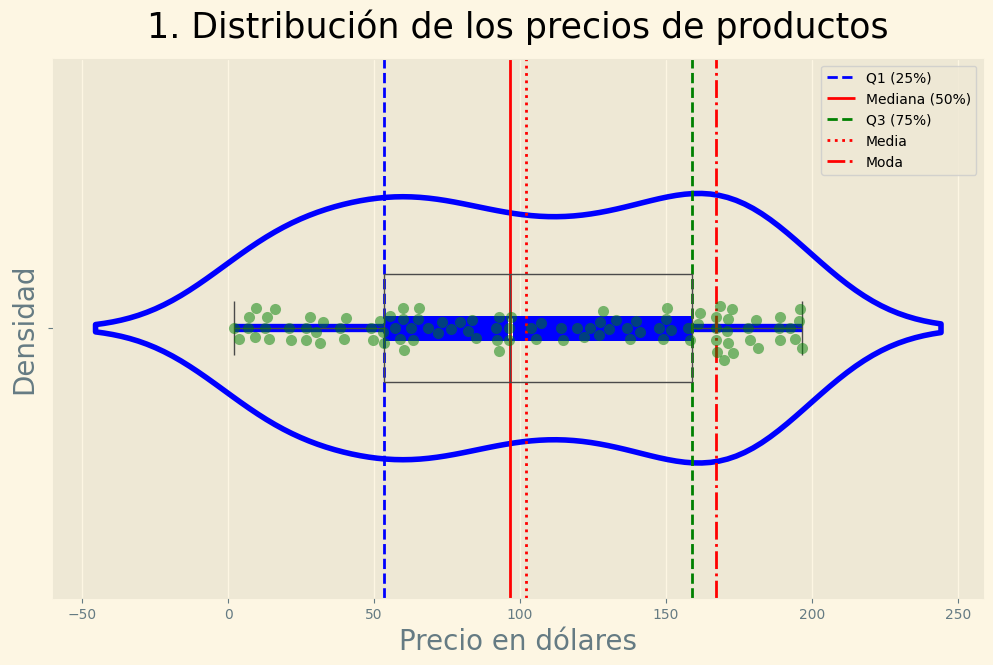

In [224]:
# establezco el estilo del gráfico 
plt.style.use('Solarize_Light2')
# establezco el cuadro y los ejes del gráfico
fig, ax = plt.subplots(figsize=(12,7))


# creo el gráfico violín con seaborn
violin = sns.violinplot(x=products["price"], 
               linewidth= 4, 
               width= 0.5,
               color= 'blue',
               orient='h', # para establecer una orientación horizontal
               fill=False,
               density_norm='count'  # para la normalización de los datos
            )


# Grafico unas líneas con los cuartiles 
ax.axvline(x = price_stats['25%'], color="blue", linestyle="--", linewidth=2, label="Q1 (25%)")
ax.axvline(x= price_median, color="red", linestyle="-", linewidth=2, label="Mediana (50%)")
ax.axvline(x= price_stats['75%'], color="green", linestyle="--", linewidth=2, label="Q3 (75%)")
ax.axvline(x= price_stats['mean'], color="red", linestyle=":", linewidth=2, label="Media")
ax.axvline(x= price_mode, color="red", linestyle="-.", linewidth=2, label="Moda")

# por esto incluyo dentro del gráfico violín la representación del gráfico de caja para observar los valores reales
caja = sns.boxplot(x=products["price"], 
                   width=0.2,
                   boxprops={'facecolor':'None'}) # para no poner relleno en la caja

# Agrego leyenda 
ax.legend(loc="upper right")
# Añado una representación de enjambre para poder observar los datos reales sobre los que estoy trabajando.
ax = sns.swarmplot(x=products["price"], 
                   color="green", 
                   edgecolor="green",
                   alpha = 0.5, # transparencia de los puntos
                   s=8, # tamaño de los círculos
             )
# establezco el título y los nombres de los ejes
ax.set_title("1. Distribución de los precios de productos", fontsize= 25,pad= 15)
ax.set_xlabel("Precio en dólares", fontsize= 20)
ax.set_ylabel("Densidad", fontsize= 20)
plt.show()

### Análisis del gráfico de violín 

El gráfico mostrado es un **diagrama de violín** que representa la distribución de los precios de los productos de la empresa en dólares. El conjunto de datos sobre el que se representa este diagrama es un conjunto de 100 productos diferentes. Este tipo de visualización combina un gráfico de densidad con un diagrama de caja (boxplot) interno, permitiendo analizar tanto la dispersión como la forma de la distribución de los datos. A continuación, se destacan los elementos más relevantes del gráfico:



#### 1.Distribución de los datos:
El diagrama de violín proporciona una visión clara de la distribución simétrica y concentrada de los precios, con una mediana de 102.1 dólares y un rango intercuartílico en torno a los 50 dólares.

La forma del violín, representada por una curva azul, indica que la distribución tiene una concentración significativa alrededor del valor central. Las regiones más anchas reflejan áreas de mayor densidad de datos, las cuales se sitúan alrededor de la mediana, pero con un descenso justo en esta zona, lo que sugiere una distribución concentrada entorno a dos picos de precios, mostrando una distribución BIMODAL. Los picos de densidad coinciden con el primer y tercer cuartil ( 53.24$ y 159.0$ respectivamente). Se puede observar además, que la mediana está desplazada hacia el primer cuartil, por lo tanto, tenemos una muestra sesgada hacia la derecha. 

Si bien la distribución parece razonablemente simétrica, no es una distribución normal, como ya he explicado anteriormente. Su concentración central y colas más cortas sugieren una distribución leptocúrtica (más "alta y estrecha" que una normal) de una distribución BIMODAL.


#### 2.Puntos individuales:

Los puntos verdes representan observaciones individuales, que ayudan a visualizar posibles valores atípicos. Sin embargo, en este caso, no hay valores extremadamente alejados que puedan ser considerados outliers.

#### 3.Discrepancia entre el violín y el diagrama de caja interno:

El diagrama de violín utiliza una estimación de densidad de Kernel(KDE) para suavizar la distribución y generar la forma del violín. Esta estimación causa ligeras discrepancias visuales entre los cuartiles representados en el boxplot interno y la curva del violín.En el gráfico, los bordes del violín pueden extenderse más allá de los límites exactos de Q1 y Q3 debido al suavizado aplicado por el Kernel, que considera la tendencia general de la densidad en lugar de ceñirse exclusivamente a los valores observados. Esta discrepancia que se puede observar en en el siguiente gráfico, desapareció al incluir otras modificaciones en el gráfico. Esto no llegué a entender por qué sucedió. 

Este tipo de distribución concentrada sugiere que los precios son bastante consistentes y no presentan variaciones extremas significativas. Esto puede ser útil para la toma de decisiones, indicando que la mayoría de los precios se encuentran en un rango relativamente predecible.

![Violin_plot_discrepancia_box_plot](imagenes\Ejercicio_1_precio.png)

### Ejercicio 2 : DOS VARIABLES NUMÉRICAS
Para esta tarea decido continuar con la variable numérica trabajada en el primer ejercicio; **el precio**, y evaluar la relación que exite entre esta y **la cantidad de ventas de cada producto**. Pienso que podría haber una relación entre ellas puesto que quizás los productos más baratos se venden más que los productos menos vendidos. 

- En primer lugar, necesito adecuar una columna con el número de veces que se ha vendido cada uno de los productos que tenemos en la variable de precios. Y creo una **variable cantidad** haciendo un count después de agrupar por product_id la tabla 'desglose_transaction' que relaciona la tabla de transacciones con la tabla de productos. 

- Después, voy a hacer un **inner join**  de con la tabla productos. En este caso será un inner para quedarme solo con los registros que tengo datos de cantidad de productos vendidos, puesto puede haber productos que no se han vendido y no me interesa utilizarlos en mi análisis de estas dos variables. Eliminando de esta manera los valores nulos de cantidad de productos.

- En esta ocasión no hay valores atípicos, así que no tengo que preocuparme de ellos. 

In [15]:
# crear la variabel 'cantidad' contando el número de productos vendidos por product_id 
# en la tabla 'desglose_transaction'
desglose = r2trans['desglose_transaction']
# agrupo por product_id y hago un count, reseteo el index para que me quede el product_id como una columna del df
cantidad = desglose.groupby(desglose['product_id']).count().reset_index()
cantidad.head(5)
cantidad.columns

Index(['product_id', 'id'], dtype='object')

In [16]:
# unir esta nueva tabla con la tabla productos con un merge()
# primero cambio el nombre de las columnas de la tabla cantidad para poder hacer el merge
cantidad = cantidad.rename(columns= {"id": "quantity", 'product_id': 'id'} )
cantidad.columns


Index(['id', 'quantity'], dtype='object')

In [ ]:
# hago un inner join con el merge porque solo quiero considerar los productos que se han vendido
# para poder ver con mayor claridad si realmente existe una relación entre el precio y sus ventas.
products_2 = pd.merge(products, cantidad, on=None, how='inner')


products_2.head(10)

,id,product_name,price,colour,weight,warehouse_id,quantity
0,1,Direwolf Stannis,161.11,#7c7c7c,1,WH-4,61
1,2,Tarly Stark,9.24,#919191,2,WH-3,65
2,3,duel tourney Lannister,171.13,#d8d8d8,1.5,WH-2,51
3,5,skywalker ewok,171.22,#dbdbdb,3.2,WH-0,49
4,7,north of Casterly,63.33,#b7b7b7,0.6,WH--2,54
5,11,Karstark Dorne,49.70,#141414,2.7,WH--6,48
6,13,palpatine chewbacca,139.59,#2b2b2b,1,WH--8,60
7,17,skywalker ewok sith,91.89,#7c7c7c,3.2,WH--12,61
8,19,dooku solo,60.33,#3f3f3f,0.6,WH--14,49
9,23,riverlands north,169.96,#545454,2.7,WH--18,68


#### Correlación Tau de Kendall
Antes de hacer la visualización de los  datos voy a evaluar la correlación entre ellos. Como ya he mencionadao anteriormente la variable precio no sigue una distribución normal por lo tanto, no se puede calcular en este caso el coeficiente de Pearson. Así que en este caso voy a usar la **Correlación Tau de Kendall "T"** que es una medida no paramétrica para evaluar la fuerza y la dirección de la asociación entre dos variable cuando estamos ante muestras pequeñas y que violan los supuestos del coef. de correlación de Pearson. 


In [18]:
import scipy.stats as stats
# calculo de la correlación Tau de Kendall
tau, p_value= stats.kendalltau(products_2['price'], products_2['quantity'])
print(tau, p_value)

-0.009436248725389779 0.9470727745819242


In [19]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
help(sns.scatterplot)

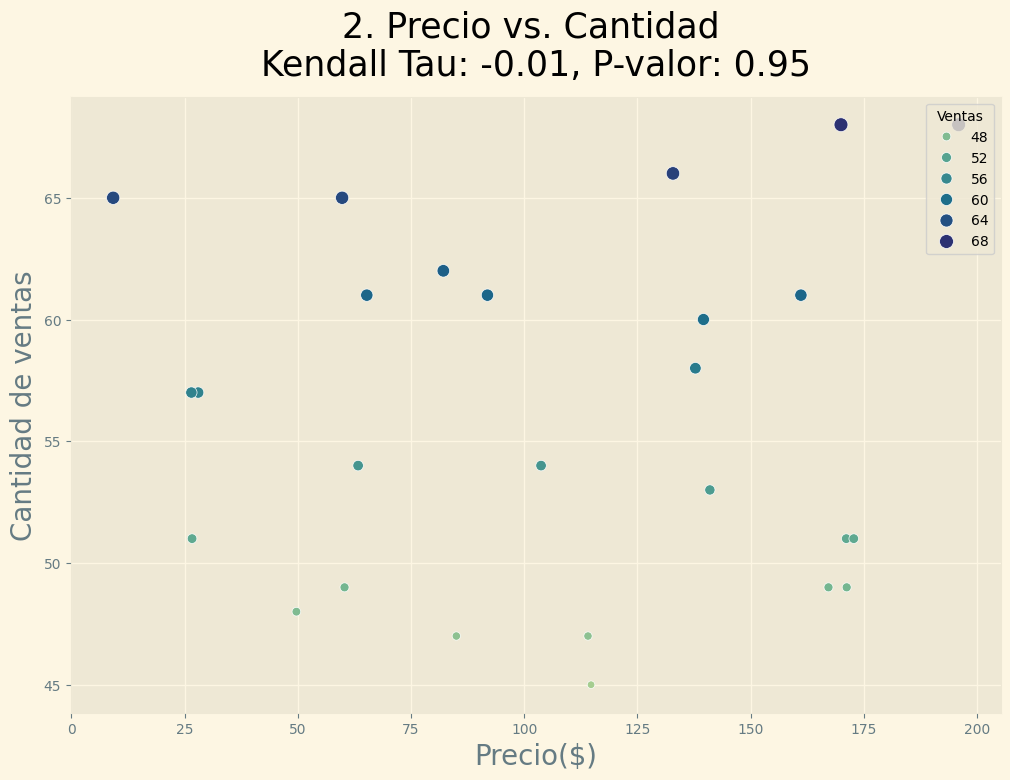

In [212]:
# representar un gráfico de dispersión con las dos variables cantidad y precio
# establezco el estilo, el cuadro y los ejes de la figura
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize=(12,8))
# creo el gráfico de dispersión con seaborn
g = sns.scatterplot(data= products_2, 
            x= 'price',
            y= 'quantity',
            hue= 'quantity',
            size= 'quantity',
            sizes= (30,100),
            palette="crest"
            )
# asigno el título y nombre de los ejes
g.set_title(f'2. Precio vs. Cantidad \nKendall Tau: {tau:.2f}, P-valor: {p_value:.2g}', fontsize= 25, pad= 15)
g.set_xlabel('Precio($)', fontsize= 20)
g.set_ylabel('Cantidad de ventas', fontsize = 20)
g.legend(title= 'Ventas', loc='upper right')
plt.show()
            

### Análisis del gráfico

El objetivo del presente análisis fue explorar la relación entre los precios de los productos ofrecidos y la cantidad de ventas obtenidas, con el fin de identificar patrones que puedan ayudar a optimizar la estrategia de precios. Se utilizó un análisis de correlación y un diagrama de dispersión para visualizar y medir esta relación.

#### 1.Correlación Tau de Kendall:

**TAU = -0.01**
Esto indica una correlación prácticamente nula entre el precio y la cantidad de ventas. De tal manera que los precios no parecen influir en la cantidad de ventas de manera positiva ni negativa. Dado este valor tan bajo de Tau incluir una línea de tendencia lineal no tendría mucho sentido, ya que la relación entre las variables es casi inexistente.

**P-valor = 0.95**
Es un valor muy por encima del 0.05, por lo tanto, la probabilidad de obtener esta correlación por azar es muy alta (
95%), lo que significa que no hay evidencia estadísticamente significativa de una relación entre las variables.

#### 2.Distribución en el gráfico:

Los puntos están dispersos de manera bastante uniforme, sin un patrón claro de subida o descenso en la cantidad de ventas conforme aumenta el precio. Esto refuerza la conclusión de que no hay una relación entre ambas variables.

#### 3.Recomendaciones

Dado que el precio no parece influir significativamente en la cantidad de ventas, podría ser conveniente explorar si existen otros factores más relevantes que estén afectando la decisión de compra. Como por ejemplo, segmentos específicos de productos o clientes donde la relación precio-cantidad sea más evidente.

### Ejercicio 3: UNA VARIABLE CATEGÓRICA

Entre las diferentes variables categóricas de la base de datos, decido enfocarme ahora en la tabla de empresas y decido analizar la varible **pais** ('country'). Esta variable categórica es de tipo nominal, es decir, que son grupos sin orden o clasificación inherente. Por lo tanto, no es posible realizar ciertos cálculos estadísticos, como suma, pero sí es posible hacer conteos, calcular frecuencias o probabilidades. 

Teniendo en cuenta la naturaleza de la variable, las opciones de visualización se reducen. En este caso utilizo un **diagrama de barras** para poder observar la cantidad de empresas en cada país. Con el gráfico de barras, cada entidad de la variable categórica se representa con una columna, y la altura de la barra representa la cantidad de registros de esa variable, aunque también se puede representar el porcentaje, la frecuencia o la densidad de esta variable. 

Analizo esta variable porque pienso que será interesente en futuros ejercicios para evaluar la cantidad de ventas totales o por producto y que podría ser de interés para las diferentes áreas de negocio de la empresa. 

In [21]:
# Creo un dataframe con la tabla 'company' para trabajar más fácilmente.
empresa = r2trans['company']

#### Visualización: DIAGRAMA DE BARRAS
Decido hacer un diagrama de barras, en lugar de un histograma puesto que mi variable no es una variable numérica continua y no voy a poder observar una distribución normal, ni tiene mucho sentido hacer una visualización de la densidad de los datos con un KDE. Ante esto, pienso que tiene más sentido representar la variable elegida en un gráfico de barras, que además puedo ordenar ascendente o descendente en función de la cantidad de datos de cada categoría. 
Para poder hacer esto, calculo el número de empresas por país y lo guardo en una variable del tipo Serie que voy a usar posteriormente para la gráfica, tanto para ordenarla, como para asignarle un color a las barras. 

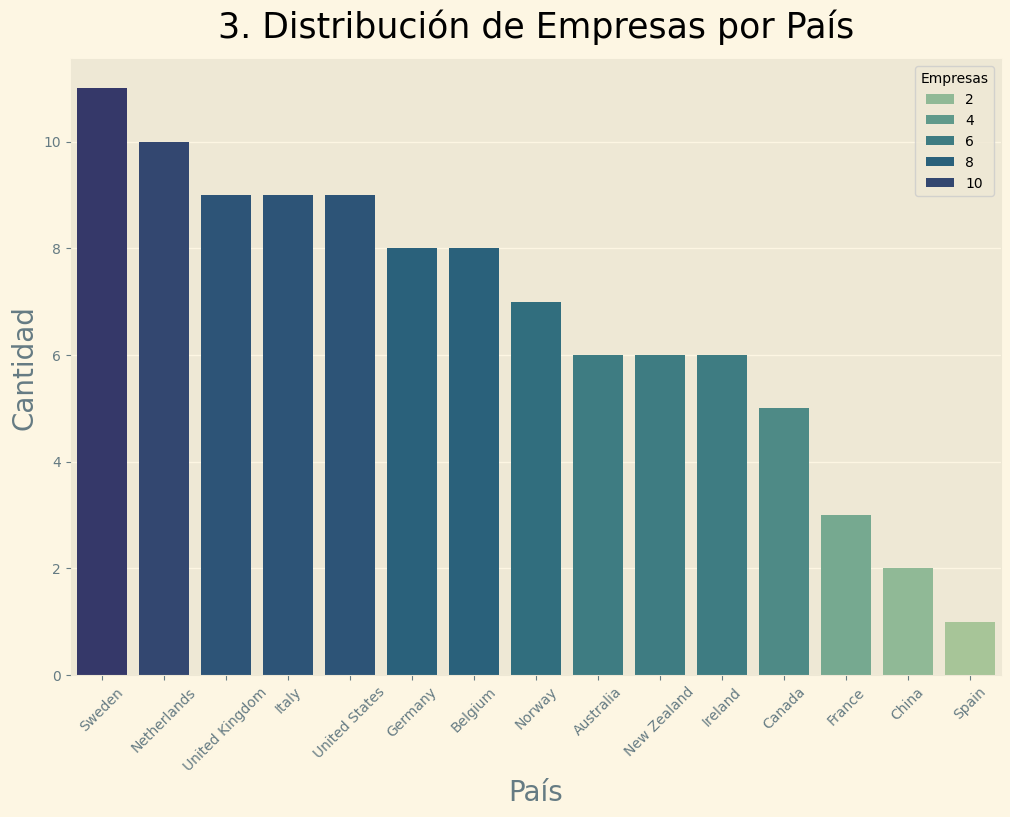

In [191]:
# Establezco el estilo, el cuadro y los ejes de la figura
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize=(12, 8))

# calculo el número de empresas por país y los ordeno para gráficar en orden descendente
country_count = empresa.groupby('country')['company_id'].count().sort_values(ascending=False)

# grafico los datos en un gráfico de barras
graph = sns.barplot(x=country_count.index, # accedo a los índices de la serie que son los países
            y=country_count.values, # accedo a los valores de la Serie que son el número de empresas
            hue = country_count,
            palette="crest", 
            ax=ax)

# formateo el los ejes y la figura
#graph.set_xticklabels
plt.xticks(rotation=45)
graph.set_title("3. Distribución de Empresas por País", fontsize = 25, pad= 15)
graph.set_xlabel('País', fontsize= 20)
graph.set_ylabel("Cantidad", fontsize = 20)
graph.legend(title= 'Empresas')
plt.show()


### Análisis del gráfico 

Este gráfico de barras representa la distribución de empresas por país, indicando la cantidad de empresas en cada país. Los países están organizados en orden descendente de acuerdo con la cantidad de empresas. Además, se utiliza un gradiente de color para representar visualmente la magnitud de las cantidades.

#### Análisis descriptivo:

Suecia (Sweden) lidera con la mayor cantidad de empresas, con más de 10 empresas representadas. Mientras que en la cola se situa España(Spain) con una única empresa en el sector. Respecto al resto, el número de empresas varía entre aproximadamente 2 y 10, mostrando que algunos países tienen una representación mucho mayor que otros.

Además, se observa una mayor representación de países del norte de Europa entre los países con mayor número de empresas, exceptuando Italia y Estados Unidos. 

#### Recomendaciones

- Sería interesante fortalecer mercados principales (Suecia, Países Bajos) para garantizar los ingresos bases y el-  crecimiento.
- Sería aconsejable evaluar estrategias para incrementar la presencia en mercados secundarios (Italia, Reino Unido, EE. UU.).
- Mientras que en los mercados menos representados, se podría realizar un análisis de viabilidad (España, China, Francia) y decidir si vale la pena invertir en ellos.

### Ejercicio 4: UNA VARIABLE CATEGÓRICA Y UNA VARIABLE NUMÉRICA

En este ejercicio tomo como variable categórica **el país de las empresas** y como vairable numérica **el importe ('amount') de las transacciones**. El objetivo es poder comparar la distribución de las transacciones por país. Utilizar el diagrama de cajas ('boxplot') es una opción muy recomendable para la consecución de esta meta. 

In [23]:
# cambio el nombre de la columna en la tabla transacciones para que coincida con la tabla empresa
# y poder hacer el merge()
transaction = transaction.rename(columns= {"business_id": "company_id"} )
transaction.columns

Index(['id', 'card_id', 'company_id', 'timestamp', 'amount', 'declined',
       'product_ids', 'user_id', 'lat', 'longitude'],
      dtype='object')

In [24]:
# el tipo de dato de la columna 'amount' es un string
print(type(transaction['amount'][0]))
# convierto la columna 'amount' de str a float
transaction['amount'] = transaction['amount'].astype('float')
trans_empresa = pd.merge(transaction, empresa, on='company_id',how='inner')

<class 'str'>


### Visualización: DIAGRAMA DE CAJAS ('BOXPLOT')

 Decido usar el **diagrama de cajas** puesto que nos muestra la variabilidad de las transacciones de manera estadística para cada una de las categorías de la variable, en este caso los 15 países. Así podemos percibir de una manera visual la mediana, el rango intercuartil, la dispersión de los datos y su simetría. 

C:\Users\ronch\AppData\Local\Temp\ipykernel_50700\2508828043.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_resumen = trans_empresa.groupby('country')['amount'].describe().reset_index()
C:\Users\ronch\AppData\Local\Temp\ipykernel_50700\2508828043.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transacciones_pais = trans_empresa.groupby('country')['amount'].count().sort_values(ascending=False)


           country  count        mean         std     min       25%      50%  \
0          Germany  118.0  244.203220  149.658844   15.05  108.6800  247.935   
1   United Kingdom  100.0  270.731700  145.882836   20.93  144.2200  291.100   
2           Sweden   79.0  260.615063  143.587291   15.38  134.3650  274.280   
3           Norway   68.0  254.216324  133.421060   23.86  157.6100  254.530   
4          Ireland   62.0  277.308387  139.819171   22.16  157.6500  283.445   
5           Canada   61.0  269.647869  131.335128   20.44  159.1400  285.240   
6      Netherlands   18.0  253.017778  179.317567   21.24   46.7675  309.065   
7    United States   17.0  309.179412  160.292693   20.35  179.4000  340.870   
8            Italy   17.0  201.590000  154.779715   21.93   57.0400  183.840   
9          Belgium   13.0  228.147692  141.983942   33.34  105.8200  230.410   
10       Australia   12.0  232.052500  162.789664   47.15   62.6825  234.035   
11     New Zealand   11.0  222.277273  1

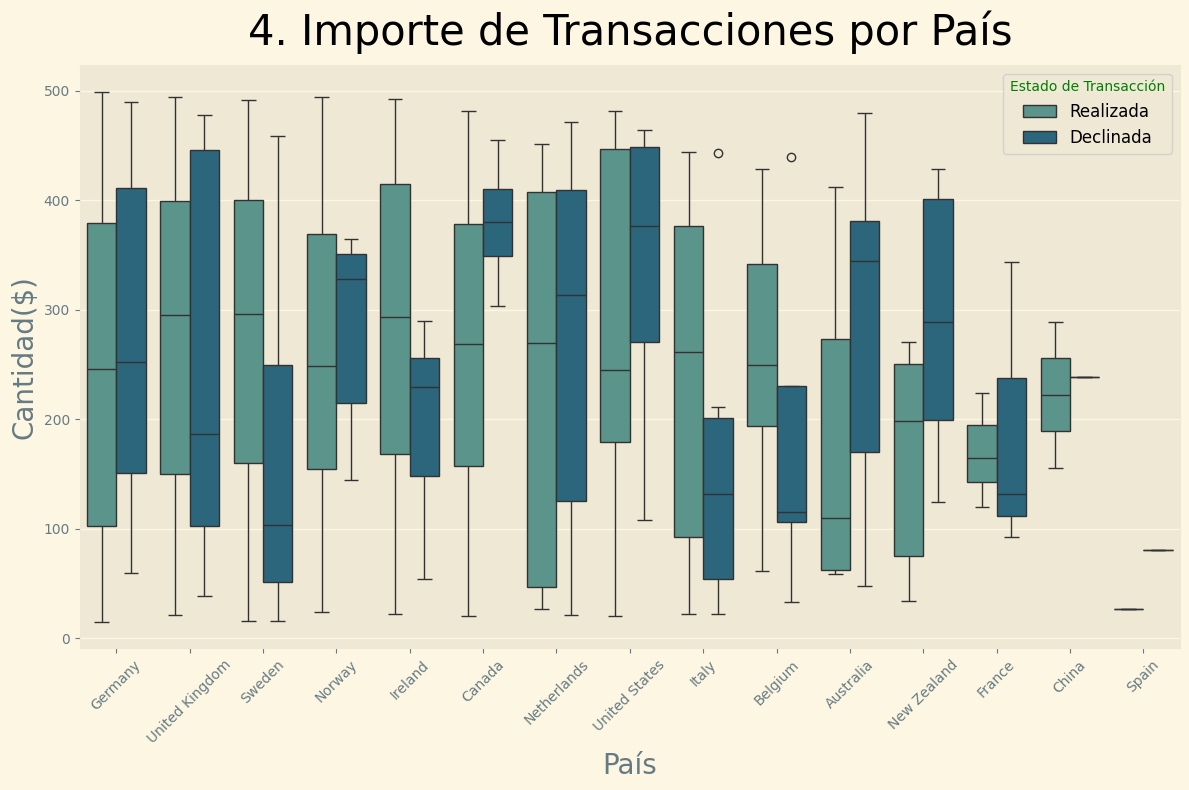

In [ ]:
# establezco el estilo, el cuadro y los ejes de la figuara
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize=(12,8))
# Calculo un tabla con las medidas estadísticas más significativas por país. 
df_resumen = trans_empresa.groupby('country')['amount'].describe().reset_index()
print(df_resumen)

# Calculo el número total de transacciones  por país
transacciones_pais = trans_empresa.groupby('country')['amount'].count().sort_values(ascending=False)

# Ordeno los países en función del número de transacciones
orden_paises = transacciones_pais.index # tomo el índice de la serie transacciones_pais que es el nombre del país en el orden de mayor a menor transacciones
# transformo la columna 'country' del df trans_empresa en una columna del tipo 'Categoria ordenada'
# para usaar este orden de los países a la hora de graficar.
trans_empresa['country'] = pd.Categorical(trans_empresa['country'], categories=orden_paises, ordered=True)

# grafico el diagrama de cajas
sns.boxplot(data= trans_empresa,
           x= "country",
           y= "amount",
           hue='declined', # sirve para graficar en función de si las transacciones están declinadas o no 
           palette="crest",
           ax=ax)


# Establezco los títulos del gráfico y ejes
plt.xticks(rotation= 45)
ax.set_title("4. Importe de Transacciones por País", fontsize = 30, color= 'black', pad=15)
plt.xlabel('País', fontsize= 20)
plt.ylabel("Cantidad($)", fontsize = 20)
# Cambiar etiquetas de la leyenda
handles, labels = ax.get_legend_handles_labels()
legend= ax.legend(handles, ['Realizada', 'Declinada'], title="Estado de Transacción", fontsize=12)
plt.setp(legend.get_texts(), color='black')  # Cambiar color del texto de la leyenda
plt.setp(legend.get_title(), color='green')
plt.tight_layout()
plt.show()

### Análisis del gráfico 
Este gráfico de caja ("boxplot") muestro la distribución del importe de transacciones por país, diferenciando entre transacciones realizadas y declinadas. 

#### 1. Comparación de las distribuciones de las transacciones realizadas y declinadas
En algunos países, como Alemania, Italia y Estados Unidos, las transacciones declinadas tienen una mediana similar o más baja en comparación con las realizadas.
En otros casos, como Nueva Zelanda y Bélgica, las transacciones declinadas tienen una mediana más alta que las realizadas, lo cual podría indicar un mayor valor promedio en las transacciones rechazadas.

#### 2. Variabilidad de los importes por país
En general se observa en los países con más transacciones una gran dispersión en los importes (rangos intercuartílicos más amplios) de las transacciones realizadas, lo que sugiere que los valores de transacciones varían significativamente.
En contraste, países como Bélgica, Francia y China tienen rangos más estrechos, indicando importes más consistentes. Algo que es commprensible puesto que han realizado menos transacciones. 

#### 3. Observaciones y recomendaciones
- Los países con medianas de transacciones declinadas significativamente altas podrían indicar, algunos problemas con límites de crédito o aprobación de grandes valores.
- Investigar los países con mayores diferencias en el importe entre transacciones realizadas y declinadas 

### Ejercicio 5: DOS VARIABLES CATEGÓRICAS

Para esta tarea me voy a centrar en la información sobre los ususarios. Elijo la variable categórica nominal **país de residencia** de los usuarios y como segunda variable decido categorizar **la edad** para convertir esta variable numérica en una variable categórica ordinal, puesto que se pueden ordenar las categorías de esta variable de menor a mayor. Gracias a una función realizo el proceso de categorización. 

El objetivo es mostrar los porcentajes de usuarios en función de su edad para cada uno de los países en los que tenemos datos. Y posteriormente, visualizo esta información en un gráfico de barras agrupadas. 



In [ ]:
from datetime import datetime
users = r2trans['users']

birthday_date = users['birth_date']
birthday_date = pd.to_datetime(birthday_date)

# Obtengo la fecha actual
actual_date = pd.Timestamp.today()

# Calculo la diferencia entre fecha actual y nacimiento 
# me devuelve un dato tipo 'Timedelta'
# con dt.days obtengo los días como números enteros y lo convierto en años
age = ((actual_date - birthday_date).dt.days / 365.25).astype('int')
age = pd.DataFrame(age).reset_index()
age = age.rename(columns= {'index': 'id', 'birth_date': 'age'})
age['id'] = age['id'].astype('str')
age['age'] = age['age'].astype('int')
users = pd.merge(users,age, on='id', how='left')


In [37]:
# Creo la función necesaria para categorizar las edades de los usuarios
def cat_edad(age):
    '''' Función que recibe una edad y devuelve una categoría'''
    if age > 40:
        return '40-45'
    elif age <= 40 and age >35:
        return '36-40'
    elif age <= 35 and age >30:
        return '31-35'
    else:
        return '25-30'
# Añado una columna nueva a la tabla 'users' aplicando la función que acabo de crear              
users['cat_edad'] = users['age'].apply(cat_edad)       

In [38]:
# Agrupo por país y por rango de edad para hacer un count. 
# Utilizo la función .size() para contar el número de registros en cada combinación de country y cat_edad.
country_age_count = users.groupby(['country','cat_edad']).size().reset_index(name='count')
country_age_count

,country,cat_edad,count
0,Canada,25-30,19
1,Canada,31-35,20
2,Canada,36-40,20
3,Canada,40-45,16
4,United Kingdom,25-30,15
5,United Kingdom,31-35,13
6,United Kingdom,36-40,11
7,United Kingdom,40-45,11
8,United States,25-30,45
9,United States,31-35,39


In [177]:
# En lugar de visualizar el total de usuarios, pienso que es más representativo 
# visualizar el porcentaje de usuarios por país.
# Primero calculo el total de usuarios por pais.
country_totals = country_age_count.groupby('country')['count'].transform('sum')  # Total por país
# Calculo el porcentaje y añado una columna al df anterior llamada 'percentage'
country_age_count['percentage'] = round((country_age_count['count'] / country_totals) * 100, 1)
country_age_count


,country,cat_edad,count,percentage
0,Canada,25-30,19,25.3
1,Canada,31-35,20,26.7
2,Canada,36-40,20,26.7
3,Canada,40-45,16,21.3
4,United Kingdom,25-30,15,30.0
5,United Kingdom,31-35,13,26.0
6,United Kingdom,36-40,11,22.0
7,United Kingdom,40-45,11,22.0
8,United States,25-30,45,30.0
9,United States,31-35,39,26.0


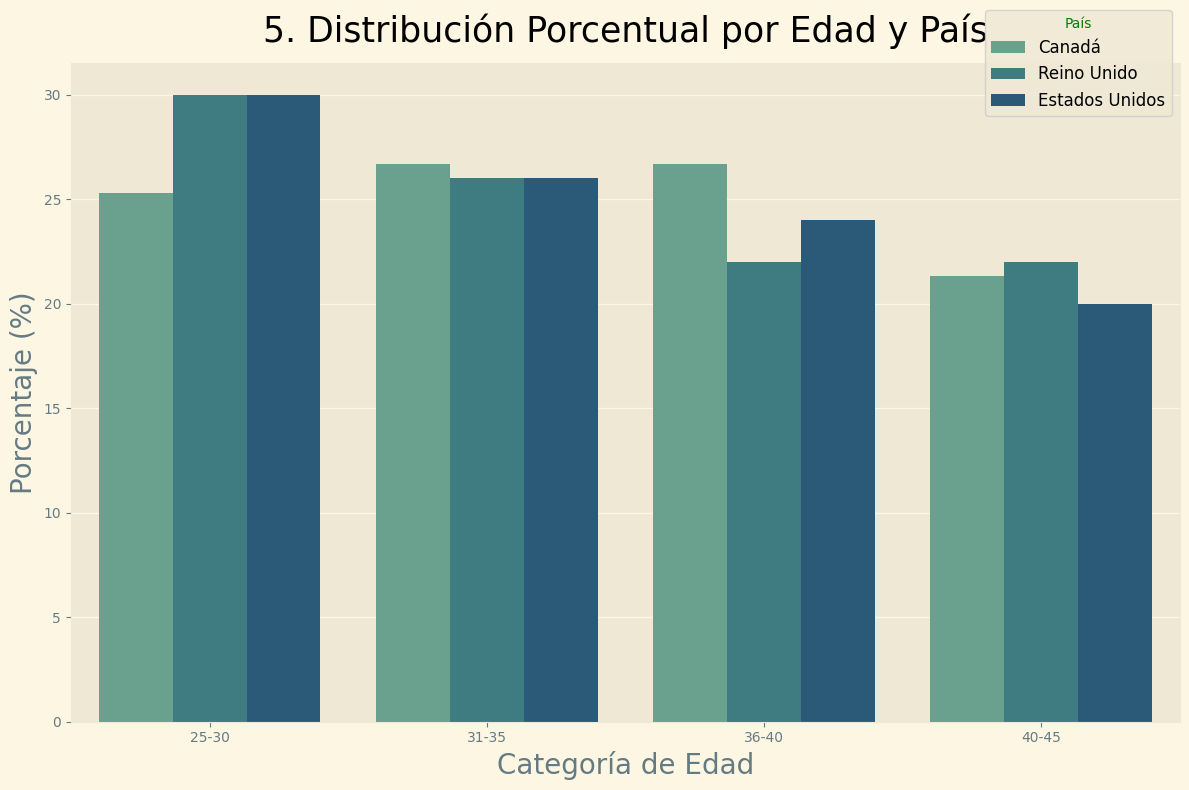

In [197]:
# Visualización del gráfico de barras agrupadas
# establezco el estilo, el cuadro y los ejes de la figuara
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize=(12,8))
# Defino el orden de las categorías de edad
orden_categorias = ['25-30', '31-35', '36-40', '40-45']

# Convierto 'cat_edad' en una categoría ordenada
country_age_count['cat_edad'] = pd.Categorical(
    country_age_count['cat_edad'],
    categories=orden_categorias,
    ordered=True
)

# Creo el gráfico de barras agrupadas
ax = sns.barplot(
    data=country_age_count,
    x='cat_edad',
    y='percentage',
    hue='country',
    palette="crest",
    order=orden_categorias) 
# Formateo el título, los ejes y la leyenda
plt.title('5. Distribución Porcentual por Edad y País', fontsize=25, pad= 15)
plt.xlabel('Categoría de Edad', fontsize=20)
plt.ylabel('Porcentaje (%)', fontsize=20)
handles, labels = ax.get_legend_handles_labels() # función que recupera las formas de gráficos(barra,línea) y los labels
labels = ['Canadá', 'Reino Unido', 'Estados Unidos']
legend= ax.legend(handles, labels, 
                  title="País",fontsize=12, bbox_to_anchor=(1.00, 1), loc='center right')
legend.get_title().set_color('green')
plt.tight_layout() # ajusto automáticamente los margenes y espaciados
plt.show()

### Análisis del Gráfico
En esta visualización se presenta una distribución porcentual de usuarios por país y edas. Se ha mostrado una segmentación de los usuarios en función de sus edades, en segmentos de edad de 5 años, desde los 25 hasta los 45 años, que es el rango de edades entre las que se encuentran los usuarios. 

#### 1. Comparaciones entre países
Se puede observar cómo se distribuyen las personas de diferentes países en las distintas categorías de edad.
Por ejemplo, en el rango de edad "25-30", Reino Unido tiene el porcentaje más alto, mientras que Estados Unidos el valor más bajo. Sin embargo, en los rangos de edades entre 30 y 40 años, la proporción de usuarios en los tres países es muy similar. 

#### 2. Tendencias de edad en cada país
Reino Unido parece tener una mayor concentración de personas en el rango de edad de 25-30, mientras que el porcentaje de personas en el rango más alto, es significativamente mucho menor. 
Canadá y Estados Unidos muestran una distribución más equilibrada entre los diferentes rangos de edad, aunque con algunas variaciones significativas en ciertos rangos.

#### 3. Recomendaciones
El rango de edad "25-30" tiene un alto porcentaje en todos los países, se podría concluir que los compradores más jóvenes son los más interesados en sus productos. La empresa podría considerar enfocar sus esfuerzos de marketing hacia este grupo, centrándose en campañas que atraigan a este grupo.



### Ejercicio 6: TRES VARIABLES

En esta ocasión me decanto por dos variables numéricas. Por un lado, **el total de ventas** en dólares sin considerar las cantidades de las transacciones declinada, que es una variable numérica continua y **el número de transacciones realizadas**, es decir, que no han sido declinadas. Esta variable es una variable numérica discreta. Surge de un conteo de la cantidad de transacciones realizadas por país. Y además la variable categórica nominal de **país**. 
Con el objetivo de ver la relación que existe entre las variables numéricas en función del país en el que se realizan las ventas. Para esto voy a realizar un análisis de correlación. 

In [42]:

# convierto el tipo de datos de la columna 'declined' de str a int para poder aplicar un filtro
trans_empresa['declined'] = trans_empresa['declined'].astype('int')
# creo el filtro de transacciones realizadas
filtro_realizadas = trans_empresa['declined'] == 0
# aplico el filtro a la table 'trans_empresa'
trans_realizadas = trans_empresa[filtro_realizadas]
# sumo las ventas totales por país
ventas_totales_pais = trans_realizadas.groupby('country', observed=True)['amount'].sum().reset_index()
# cuento el número de transacciones realizadas por pais
trans_pais_realizadas = trans_realizadas.groupby('country', observed=True)['declined'].count().reset_index()
# uno estos dos df para poder graficar 
ventas_realizadas_pais= pd.merge(ventas_totales_pais, trans_pais_realizadas, on = 'country', how= 'inner')
ventas_realizadas_pais= ventas_realizadas_pais.rename(columns={'declined':'realizadas'})


In [213]:
ventas_realizadas_pais

,country,amount,realizadas
0,Germany,26888.55,111
1,United Kingdom,25274.38,93
2,Sweden,18813.45,68
3,Norway,15318.01,61
4,Ireland,16006.22,56
5,Canada,14930.69,57
6,Netherlands,2409.40,10
7,United States,2587.78,9
8,Italy,2190.08,9
9,Belgium,2041.74,8


Para determinar el análisis de correlación más apropiado para mis datos. Primero, debo saber que variables voy a evaluar. En este caso las dos variables numéricas que he elegido no son dos variables continuas, no es posible estimar la relación entre ellas con el Coeficiente de Pearson. Además, si realizo la prueba de normalidad *Shapiro* para la variable numérica 'amount'  también me da un *valor p* muy por debajo de 0.05. Lo cual me confirma que estoy ante una variable que no sigue una distribución normal. Así que, voy a usar de nuevo el **Coeficiente de correlación Tau de Kendall**. 

In [43]:
stat_amount, p_value_amount = shapiro(ventas_realizadas_pais['amount'])
if p_value_amount > 0.05:
    print(f"La distribución es aproximadamente normal: p_value = {p_value_amount:2f}")
else:
    print(f"La distribución no es normal: p_value = {p_value_amount:2f}")

La distribución no es normal: p_value = 0.002864


In [44]:
# calculo de la correlación Tau de Kendall
tau_2, p_value_2= stats.kendalltau(ventas_realizadas_pais['realizadas'], (ventas_realizadas_pais['amount']))
print(tau_2, p_value_2)

0.9327354270056935 1.4938683754189712e-06


#### Correlación Tau de Kendall:

**TAU = 0.93**
Un τ de 0.93 indica una relación extremadamente fuerte y positiva entre las dos variables. Esto significa que, en el 93% de las comparaciones posibles entre pares de observaciones, cuando una variable aumenta, la otra también aumenta.

**P-valor = 0.0000014**
Este valor tan por debajo de 0.05 nos muestra que la relación observada es estadísticamente significativa la probabilidad de una correlación tan alta debida al azar es prácticamente cero.

Puesto que estoy ante una correlación lineal alta positiva, me indica que **una línea de regresión** podría ser un buen modelo para los datos. Así que decido, añadir una línea de regresión en el gráfico. 

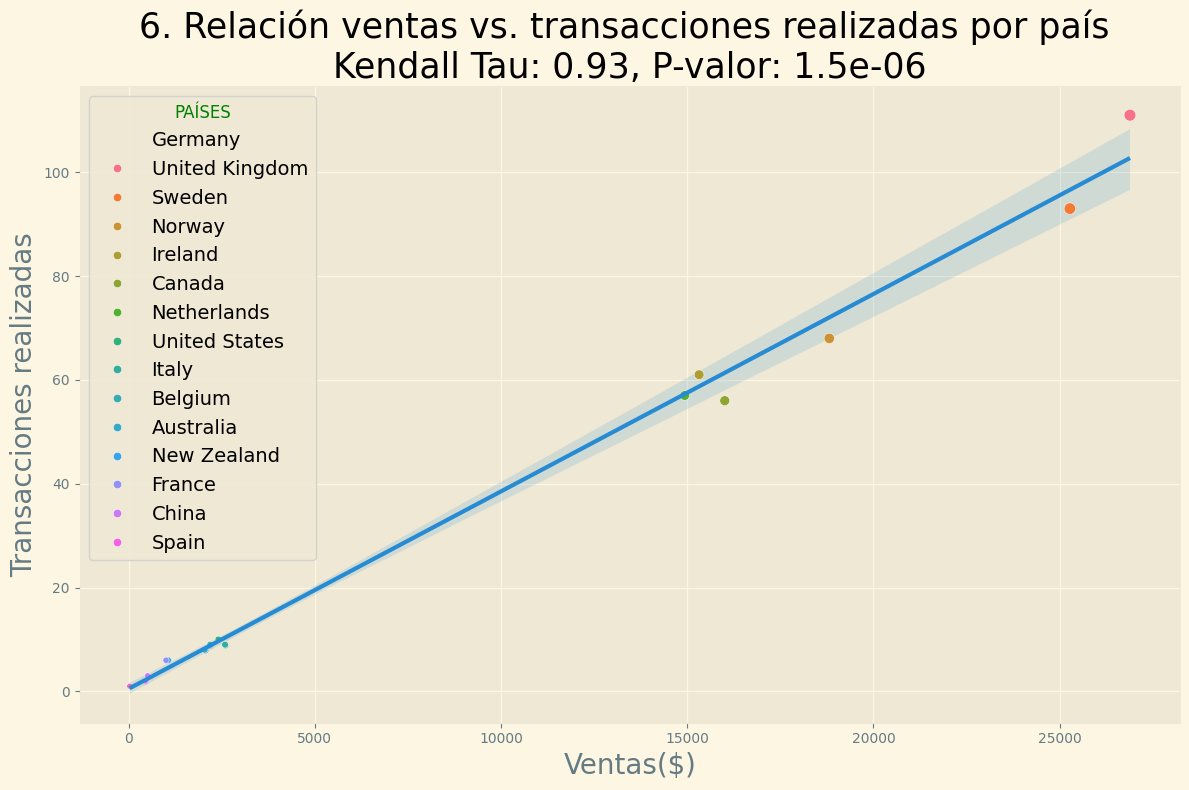

In [243]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize=(12,8))

# Grafico la linea de regresión y la banda de errores
ax = sns.regplot(data= ventas_realizadas_pais , 
            x= 'amount' ,
            y= 'realizadas',
            scatter_kws= {'s': 10},
            ax=ax) 
# Dibujo el gráfico de dispersión en función de los países
sns.scatterplot(data= ventas_realizadas_pais , 
            x= 'amount' ,
            y= 'realizadas',
            hue= 'country', # definir el color en función de que variable quiero visualizar 
            #palette="crest",
            size= 'amount') 
# Formateo el título y los ejes 
ax.set_title(f"6. Relación ventas vs. transacciones realizadas por país \nKendall Tau: {tau_2:.2f}, P-valor: {p_value_2:.2g}", 
             fontsize = 25, color= 'black')
plt.xlabel('Ventas($)', fontsize= 20)
plt.ylabel("Transacciones realizadas", fontsize = 20)
# Cambio etiquetas de la leyenda
handles, labels = ax.get_legend_handles_labels()
legend= ax.legend(handles,ventas_realizadas_pais['country'], title="PAÍSES", fontsize=14)
plt.setp(legend.get_title(), color='green', fontsize=12)
plt.tight_layout()
plt.show()


### Análisis del gráfico
El gráfico muestra la relación entre las ventas ($) y el número de transacciones realizadas desglosado por país. Se incluye una regresión lineal para analizar la relación entre ambas variables.

#### 1. Fuerte correlación 
Un τ de 0.93 y un P-valor = 0.0000014 nos muestra una fuerte correlación positiva entre las variables numéricas, además de una probabilidad baja de que esta relación sea al azar. Sin embargo, cabe recordar que no siempre una fuerte correlación immplica un efecto de causalidad. 

#### 2. Regresión lineal
Debido a esta fuerte relación estimar un modelo de regresión lineal predictivo es una opción bastante apropiada. 
La línea de regresión indica una tendencia lineal positiva: a medida que aumenta el número de transacciones, la cantidad total de ventas también crece.
La sombra azul alrededor de la línea representa el intervalo de confianza, que en este caso es estrecho, lo que indica que el modelo tiene una buena precisión para ajustar los datos, es decir que el margen de error es bastante bajo.

#### 3. Dispersiones por país

Algunos puntos se alejan ligeramente de la línea, lo que puede reflejar diferencias en el gasto promedio por transacción entre países. Por ejemplo:
Alemania parece tener valores más altos de ventas por transacción.
Países como España o Francia tienen valores más bajos.

#### 4. Recomendaciones
La fuerte correlación indica que incrementar el número de transacciones es un factor clave para aumentar las ventas totales. Esto puede lograrse mediante estrategias como: promociones o programas de fidelización. 
Los países que se sitúan más arriba y a la derecha en el gráfico (como Alemania o Reino Unido) tienen un alto valor en ventas. Es crucial aprovechar estos mercados con alto rendimiento mientras se identifican oportunidades en mercados con menor desempeño.


### Ejercicio 7: GRAFICAR UN PAIRPLOT


Un gráfico **pairplot** es tipo de visualización que ofrece una amplia representación: muestra las relaciones para todos los pares de de variables representados y la distribución  para cada variable, por esta razón no es necesario especificar ninguna de las columnas de datos para los ejes x e y, ya que el gráfico va a incluir una comparación entre variables potenciales de presentar una relación entre ellas.

Para esta visualización decido usar los datos de **ventas totales** 'amount', **media de ventas** 'average_amount' y la **edad** 'age' de los usuarios en función de los países donde se ubican los compradores. Para ello, ha sido necesiro hacer la unión de dos tablas de la base de datos, 'transaction' y 'users'. 

In [ ]:

users = users.rename(columns= {'id':'user_id'})
print(users.columns)
trans_users = pd.merge(transaction, users, on='user_id', how='left')
trans_users['amount'] = pd.to_numeric(trans_users['amount'], errors='coerce')
trans_users_mean = trans_users.groupby('user_id')['amount'].mean().reset_index()
trans_users_mean = round(trans_users_mean,2)
trans_users_mean.rename(columns={'amount': 'average_amount'}, inplace=True)
trans_users_mean
trans_users = pd.merge(trans_users, trans_users_mean, on='user_id', how='left')
trans_users.head(5)


Index(['user_id', 'name', 'surname', 'phone', 'email', 'birth_date', 'country',
       'city', 'postal_code', 'address', 'age'],
      dtype='object')


,id,card_id,company_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,surname,phone,email,birth_date,country,city,postal_code,address,age,average_amount
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9184589824,-12.5275561984,...,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,"Sep 21, 1984",United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",25.0,293.63
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9694885888,-117.5251835904,...,Benjamin,0800 1111,porttitor@icloud.ca,"May 15, 1987",United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,30.0,49.53
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.222680576,-129.049879552,...,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.,NaN,250.24
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593055232,-100.555928064,...,Keith,022-178-1548,arcu.eu@protonmail.org,"Jan 10, 1999",Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",28.0,434.62
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381445632,158.298210304,...,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,"Sep 21, 1984",United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",25.0,293.63


In [ ]:
trans_users.head(5)
# Me doy cuenta que hay un valor nulo en el df en el campo edad que acabo de crear con merge 
# y compruebo si es así.
trans_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           587 non-null    object 
 1   card_id      587 non-null    object 
 2   company_id   587 non-null    object 
 3   timestamp    587 non-null    object 
 4   amount       587 non-null    float64
 5   declined     587 non-null    object 
 6   product_ids  587 non-null    object 
 7   user_id      587 non-null    object 
 8   lat          587 non-null    object 
 9   longitude    587 non-null    object 
 10  name         587 non-null    object 
 11  surname      587 non-null    object 
 12  phone        587 non-null    object 
 13  email        587 non-null    object 
 14  birth_date   587 non-null    object 
 15  country      587 non-null    object 
 16  city         587 non-null    object 
 17  postal_code  587 non-null    object 
 18  address      587 non-null    object 
 19  age     

In [219]:
# identifico los usuarios que tienen valor nulo en la edad y lo guardo en una variable
# y lo convierto en un dataFrame
hartman = trans_users[trans_users.isnull().any(axis=1)]
hartman = pd.DataFrame(hartman)
# calculo la edad como he hecho antes con los otros usuarios
birthday_date_hartman = hartman['birth_date']
birthday_date_hartman = pd.to_datetime(birthday_date_hartman)
actual_date = pd.Timestamp.today()
age_hartman = ((actual_date - birthday_date_hartman).dt.days / 365.25).astype('int')

# hartman tiene 42 años así que voy a sustituir los valores nulos en la edad por '42'
trans_users.fillna({'age': 42.0}, inplace=True)
# compruebo que tengo ahora todos los valores de age como no nulos
trans_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              587 non-null    object 
 1   card_id         587 non-null    object 
 2   company_id      587 non-null    object 
 3   timestamp       587 non-null    object 
 4   amount          587 non-null    float64
 5   declined        587 non-null    object 
 6   product_ids     587 non-null    object 
 7   user_id         587 non-null    object 
 8   lat             587 non-null    object 
 9   longitude       587 non-null    object 
 10  name            587 non-null    object 
 11  surname         587 non-null    object 
 12  phone           587 non-null    object 
 13  email           587 non-null    object 
 14  birth_date      587 non-null    object 
 15  country         587 non-null    object 
 16  city            587 non-null    object 
 17  postal_code     587 non-null    obj

In [218]:
trans_users.head(3)

,id,card_id,company_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,surname,phone,email,birth_date,country,city,postal_code,address,age,average_amount
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9184589824,-12.5275561984,...,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,"Sep 21, 1984",United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",25.0,293.63
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9694885888,-117.5251835904,...,Benjamin,0800 1111,porttitor@icloud.ca,"May 15, 1987",United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,30.0,49.53
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.222680576,-129.049879552,...,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.,NaN,250.24


<Figure size 1200x600 with 0 Axes>

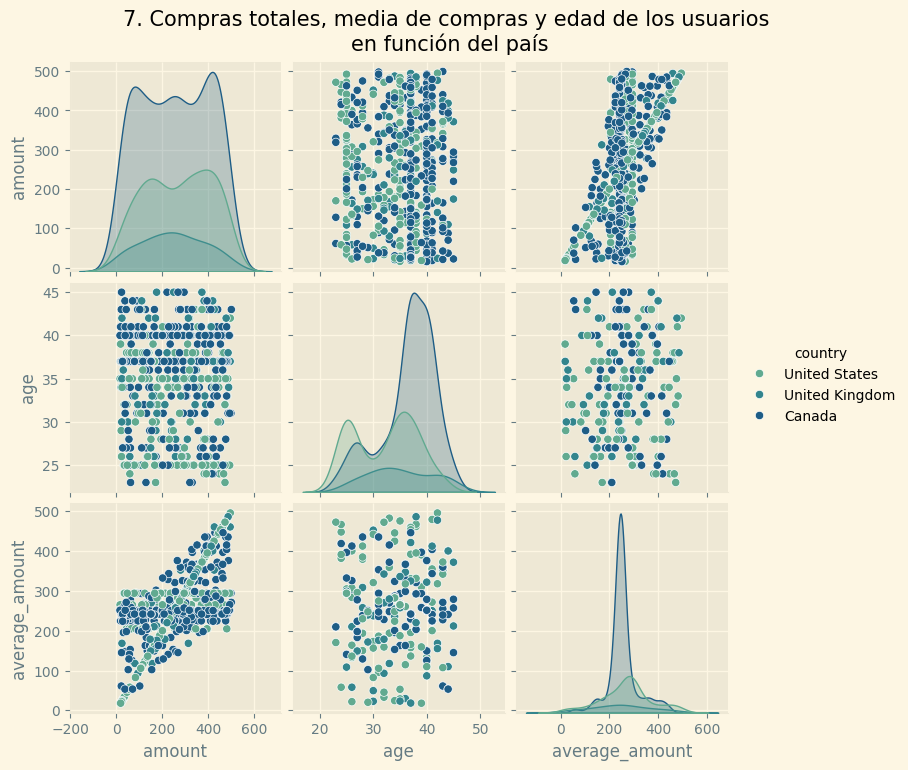

In [203]:
# Represento la figuar pairplot con seaborn
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12, 6))
ax = sns.pairplot(data= trans_users,
            hue='country',
            palette="crest")
# Formateo el título
plt.subplots_adjust(top=0.95) 
plt.suptitle("7. Compras totales, media de compras y edad de los usuarios \nen función del país", y=1.02, fontsize=15)
plt.show()

### Análisis del gráfico

Este gráfico es un pairplot o matriz de dispersión que visualiza las relaciones entre las variables *amount*, *age*, y *average_amount*, diferenciadas por país del usuario/a(Estados Unidos, Reino Unido y Canadá). 

#### 1. Distribuciones individuales (diagonales)

Las gráficas en la diagonal muestran las distribuciones de las tres variables individualmente: 
- **"amount"**: La figura de la cantidad total de compras muestra una distribución bimodal para Canadá y Estados Unidos, mientras que Reino Unido presenta una distribución más cercana a la distribución normal, pero en esta ocasión mucho más achatada, es decir, una forma platicúrtica (desviación estándar mayor)
- **"age"**: La edad también sugiere una distribución bimodal para Canadá y Estados Unidos. En el caso de Canadá presenta una distribución sesgada a la derecha con una gran concentracion de usuarios en torno a los 40 años, mucho mayor que en los otros dos países. 
- **"average_amount"**: La distribución de este variable muestra una concentración mayor valores alrededor de 300 dólares para Canadá, con una forma de la curva similar a una distribución normal en este caso leptocúrtica (desviación estándar menor). 


#### 2. Relaciones entre variables (fuera de la diagonal)

- **"amount" vs. "age"**: Parece intuirse una relación positiva en general, con algunas dispersas. Esto podría sugerir que a medida que aumenta la edad, también tiende a aumentar la cantidad gastada, pero la relación no es perfectamente lineal.
- **"amount" vs. "average_amount"**: Hay una clara relación positiva, especialmente en los países Canadá y Estados Unidos. Esto indica que en estos países las personas que gastan más en total también tienden a tener un mayor promedio de gasto por transacción.
- **"age" vs. "average_amount"**: Es una relación que presenta bastante dispersión, no parece haber una relación fuerte entre edad y promedio de compras en las transacciones, ya que los puntos están bastante distribuidos.

#### 3. Recomendaciones

En función de los resultados obtenidos, sería posible optimizar las ofertas de la empresa y diseñar promociones diferenciadas según el comportamiento de gasto. Por ejemplo, los usuarios/as con alto promedio en compras podrían responder mejor a descuentos por volumen, mientras que usuarios/as con bajos promedios podrían preferir precios más accesibles.